In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import os 

def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]
fmnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

fmnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['9', '0', '0', ..., '8', '1', '5'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [2]:
X, y = fmnist["data"], fmnist["target"]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

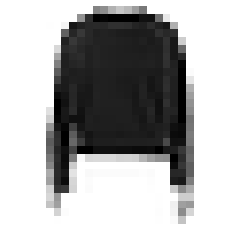

'2'

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
 interpolation="nearest")
plt.axis("off")
plt.show()

y[36000]


In [4]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['2'], dtype='<U1')

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores 

array([[ -15922.38399797,  -19579.60620312,    5937.73264319,
         -11736.1081699 ,    -271.73174831,  -51135.20230453,
         -19989.87101095, -203792.42460352,  -36171.04085248,
        -128570.24050854]])

In [19]:
sgd_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [7]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.79685, 0.82275, 0.815  ])

In [8]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[4526,   41,  119,  460,   93,    5,  577,    3,  175,    1],
       [  10, 5721,   36,  165,   23,    0,   28,    0,   15,    2],
       [  45,   16, 4009,   99, 1136,    0,  546,    0,  148,    1],
       [ 197,   81,   54, 5108,  286,    1,  138,    3,  120,   12],
       [  11,   12,  406,  373, 4487,    0,  598,    1,  112,    0],
       [  10,   19,    9,    9,    6, 5001,    8,  486,  147,  305],
       [ 708,   26,  603,  397,  987,    3, 2953,    1,  318,    4],
       [   0,    0,    0,    4,    0,  177,    0, 5551,   21,  247],
       [  29,    4,   17,   40,   30,   26,   98,   34, 5713,    9],
       [   0,    0,    2,    5,    1,   73,    1,  282,   13, 5623]],
      dtype=int64)

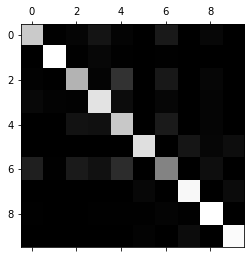

In [9]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

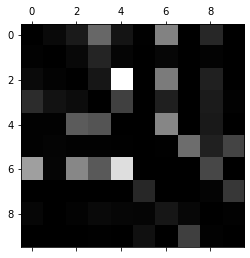

In [10]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()


In [11]:
from scipy.ndimage.interpolation import shift
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])


# Creating Augmented Dataset
X_train_augmented = [image for image in X_train]
y_train_augmented = [image for image in y_train]

for dx, dy in ((1,0), (-1,0), (0,1), (0,-1)):
     for image, label in zip(X_train, y_train):
             X_train_augmented.append(shift_image(image, dx, dy))
             y_train_augmented.append(label)

In [12]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = np.array(X_train_augmented)[shuffle_idx]
y_train_augmented = np.array(y_train_augmented)[shuffle_idx]

In [13]:
sgd_clf.fit(X_train_augmented, y_train_augmented)
sgd_clf.predict([some_digit])
cross_val_score(sgd_clf, X_train_augmented, y_train_augmented, cv=3, scoring="accuracy")


array([0.78005, 0.77432, 0.78281])

In [14]:
y_train_augmented_pred = cross_val_predict(sgd_clf, X_train_augmented, y_train_augmented, cv=3)
conf_mx_aug = confusion_matrix(y_train_augmented, y_train_augmented_pred)
conf_mx_aug

array([[23209,  1042,   842,  1022,   128,    30,  3021,     6,   675,
           25],
       [  136, 28305,   286,   861,   179,     9,   168,     6,    37,
           13],
       [  482,   471, 22204,   118,  3355,    11,  3046,     2,   308,
            3],
       [ 1540,  2408,   687, 21087,  1397,    53,  2441,    17,   297,
           73],
       [  248,   444,  7172,   919, 17127,    15,  3777,     3,   274,
           21],
       [   33,    56,    60,    28,     5, 25771,    56,  1676,   485,
         1830],
       [ 5163,   600,  5428,   670,  2778,    17, 14479,     4,   840,
           21],
       [    0,     3,     2,     3,     0,  1956,    24, 25274,   170,
         2568],
       [  301,    60,   509,   275,   141,   260,   976,   129, 27283,
           66],
       [    9,    10,     8,     3,     4,   303,    15,   635,    34,
        28979]], dtype=int64)

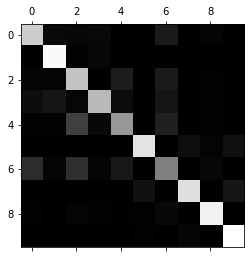

In [15]:
plt.matshow(conf_mx_aug, cmap=plt.cm.gray)
plt.show()

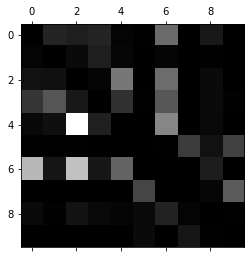

In [16]:
row_sums_aug = conf_mx_aug.sum(axis=1, keepdims=True)
norm_conf_mx_aug = conf_mx_aug / row_sums_aug
np.fill_diagonal(norm_conf_mx_aug, 0)
plt.matshow(norm_conf_mx_aug, cmap=plt.cm.gray)
plt.show()